In [21]:
import os
import pandas as pd
import seaborn as sns
from utils import *
from scipy.stats import kurtosis, skew
import numpy as np

In [ ]:
    
# Read word alignment files 

path_align_german = '/export/b15/afavaro/Frontiers/German_PD/Alignment_German'
paths= [os.path.join(path_align_german, base) for base in os.listdir(path_align_german)]

# Create data frames  

len(paths)
list_of_dataframes = []
for element in paths:
    participant = pd.read_csv(element)
    elem = os.path.basename(element)
    
    name = elem.split("_", 2)[1]
    label = elem.split("_")[0]
    task = (elem.split("_", 2)[-1].split('.csv')[0])
    
    tot= participant.time_stamp.tolist()
    tot = (list(set(tot)))
    unique = participant['time_stamp'].unique()
    stdx = unique.std()
    kurtx = kurtosis(unique)
    skewx =  skew(unique)

     # Compute standard deviation, skewness and kurtosis of the initial timestamp of each word in each recording.

    dict = {'name': name, 'label': label, 'tasks': task,   'rhythm_std': stdx,'rhythm_skew': skewx, 'rhythm_kurt': kurtx } # 'Rhythm_kurt': kurtosis, 
    df = pd.DataFrame(dict, index=[0])
    list_of_dataframes.append(df)

data = pd.concat(list_of_dataframes, ignore_index=True)
data = data.dropna()
task = data.groupby('tasks')
monolo = task.get_group('monologue_German')
cocnc =  task.get_group('concatenateread_German')
read = task.get_group('readtext_German')

## Monologue

In [ ]:
grouped = monolo.groupby("label") #here we extract the values by category
control = grouped.get_group("CN") 
parkinson_ = grouped.get_group("PD")
task = monolo.columns[-3:-2].values.tolist()
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(monolo.columns[-3:-2])])
control_all_feat = np.array([control[feat] for feat in np.array(monolo.columns[-3:-2])])

with open('/export/b15/afavaro/Frontiers/submission/GERMAN/COGNITIVE/Results/rhythm_rt_mon.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")
    
kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/GERMAN/COGNITIVE/Results/rhythm_rt_mon.txt')
holm_correction(kruskal_1)

for i, title in enumerate(task):  
    
    nome = title
    controls = []
    parkinson=[]
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]
    [controls.append('CN') for value in range(len(control_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    lista = controls+parkinson
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)

##  Read passage

In [ ]:
grouped = read.groupby("label") #here we extract the values by category
control = grouped.get_group("CN") 
parkinson_ = grouped.get_group("PD")
task = read.columns[-3:].values.tolist()
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(read.columns[-3:])])
control_all_feat = np.array([control[feat] for feat in np.array(read.columns[-3:])])


with open('/export/b15/afavaro/Frontiers/submission/GERMAN/COGNITIVE/Results/rhythm_rt_read.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/GERMAN/COGNITIVE/Results/rhythm_rt_read.txt')
holm_correction(kruskal_1)


for i, title in enumerate(task):  
    
    nome = title
    controls = []
    parkinson=[]
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]
    [controls.append('CN') for value in range(len(control_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    lista = controls+parkinson
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)


## Text Dependent Utterances (TDU)

In [ ]:
grouped = cocnc.groupby("label") #here we extract the values by category
control = grouped.get_group("CN") 
parkinson_ = grouped.get_group("PD")
task = cocnc.columns[-3:].values.tolist()
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(cocnc.columns[-3:])])
control_all_feat = np.array([control[feat] for feat in np.array(cocnc.columns[-3:])])

with open('/export/b15/afavaro/Frontiers/submission/GERMAN/COGNITIVE/Results/rhythm_conc.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/GERMAN/COGNITIVE/Results/rhythm_conc.txt')
holm_correction(kruskal_1)

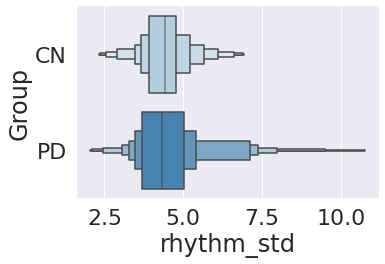

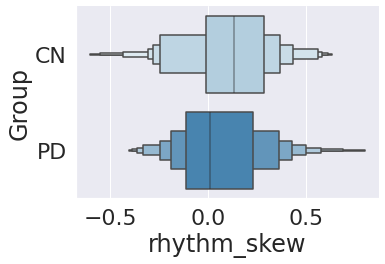

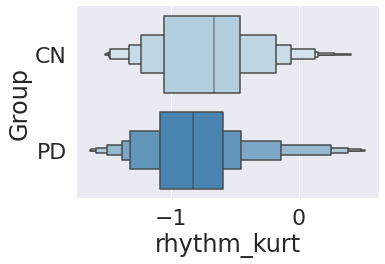

In [40]:
for i, title in enumerate(task):  
    
    nome = title
    controls = []
    parkinson=[]
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]
    [controls.append('CN') for value in range(len(control_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    lista = controls+parkinson
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)